## Observations and Insights 

1. In my opinion, the most important observation is that the Average Tumor Volume and Weight have a positive correlation of .84 - which is strong.

2. Infubinol had the only outliers within the four drugs of interest (Capomulin, Ramicane, Infubinol, and Ceftamin). Capomulin and Ramicane seemed to have the smallest tumors by the end of the regimen of the four.

3. Each Drug Regimen had more than 100 data points - meaning it had statistical significance. Also, the study had a nearly even split on Gender.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Show Mouse Meta Data
mouse_metadata.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
# Show Study Results
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_data.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [5]:
# Check the number of mice.
combined_data["Mouse ID"].count()

1893

In [6]:
# Get number of Unique Mice
combined_data["Mouse ID"].nunique()

249

In [7]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data.loc[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_data = combined_data.loc[combined_data["Mouse ID"]=="g989", :]
dup_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data["Mouse ID"] != "g989"]

#Check Number of Unique to see if mouse was removed
cleaned_data["Mouse ID"].nunique()

248

In [10]:
# Check the number of mice in the clean DataFrame.
mouse_datapoints = cleaned_data["Mouse ID"].count()
mouse_unique = cleaned_data["Mouse ID"].nunique()

# Print Results
print(f'The number of data points for all mice is {mouse_datapoints} and the number of unique mice is {mouse_unique}')

The number of data points for all mice is 1880 and the number of unique mice is 248


## Summary Statistics

In [11]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

drug_reg_grp = cleaned_data.groupby('Drug Regimen')

tumor_vol_mean = drug_reg_grp["Tumor Volume (mm3)"].mean()
tumor_vol_median = drug_reg_grp["Tumor Volume (mm3)"].median()
tumor_vol_var = drug_reg_grp["Tumor Volume (mm3)"].var()
tumor_vol_std = drug_reg_grp["Tumor Volume (mm3)"].std()
tumor_vol_sem = drug_reg_grp["Tumor Volume (mm3)"].sem()



tumor_ss_df = pd.DataFrame({"Mean": tumor_vol_mean, "Median": tumor_vol_median, "Variance": tumor_vol_var, "Standard Deviation": tumor_vol_std, "SEM": tumor_vol_sem})
tumor_ss_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# Method 2(optional): Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function. (https://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)


## Bar and Pie Charts

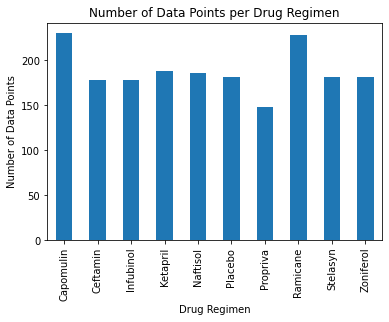

In [13]:
# Use Pandas to generate a bar plot showing the total number of mice in each treatment regimen throughout the course of the study. 

## Note: this plot will be identical to the one that uses Pyplot

#Count Mice using Group By
total_mice_df = pd.DataFrame({"Number of Data Points": (drug_reg_grp["Mouse ID"].count())})
#total_mice_df #---print to double check

pd_plot = total_mice_df.plot.bar(title="Number of Data Points per Drug Regimen", legend=False)

pd_plot.set_ylabel("Number of Data Points")
plt.savefig("PandasBarChart")
plt.show()


In [14]:
total_mice_df

,Number of Data Points
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


In [ ]:
# Use Pyplot to generate a bar plot showing the total number of mice treatment in each treatment regimen throughout the course of the study.

#Convert data to lists
mouse_count_list = total_mice_df["Number of Data Points"].tolist()
drug_reg_list = total_mice_df.index.tolist()

plt.bar(drug_reg_list, mouse_count_list, color='b', alpha=1, align="center")
plt.xticks(rotation="vertical")
plt.title("Number of Data Points per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")

plt.savefig('PyplotBarChart')
plt.show()

##  Note: this plot will be identical to the one that uses Pandas



In [ ]:
# Use Pandas to generate a pie plot showing the distribution of female versus male mice
# This is using all data points and not unique values based on the pie graph shown by the instructor

gender_count = cleaned_data["Sex"].value_counts()

gender_count.plot.pie(autopct="%1.1f%%",startangle=0, title="Male vs Female Distribution")

plt.savefig('PandasPie')
plt.show()
## Note: this plot will be identical to the one that uses Pyplot

In [ ]:
# Use Pyplot to generate a pie plot showing the distribution of female versus male mice
# This is using all data points and not unique values based on the pie graph shown by the instructor

#Get Lists
gender_count_list = cleaned_data["Sex"].value_counts().tolist()
gender_list = ["Male", "Female"]

colors = ["blue", "orange"]

explode = (0, 0)

plt.pie(gender_count_list, explode=explode, labels=gender_list, colors=colors, autopct="%1.1f%%", shadow=False)
plt.title("Male vs Female Distribution")
plt.ylabel("Sex")
##  Note: this plot will be identical to the one that uses Pandas

plt.savefig('PyplotPie')
plt.show

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the drug regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (latest) timepoint for each mouse
# Group by Mouse ID and then find the max Timepoint of each Mouse ID
latest_tp = cleaned_data.groupby(["Mouse ID"])["Timepoint"].max()
#reset the index 
latest_tp = latest_tp.reset_index()
#latest_tp #Print to test

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#Merging on Mouse ID and Timepoint - to the left to grab only the Mouse ID and Timepoint that match rows
merged_latest_df = latest_tp.merge(cleaned_data, on=["Mouse ID", "Timepoint"], how="left")
merged_latest_df

In [ ]:
# Put the four drug regimens into a list that can be iterated over in a for-loop 
# (and later used for plot labels)

drug_reg_loop = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_list =[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_reg_loop:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # Find using .loc to match drug from list - then find Tumor Volume
    tumor_vol = merged_latest_df.loc[merged_latest_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset - #append the tumor volume to a list
    tumor_vol_list.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    # If the data is in a dataframe, we use pandas to give quartile calculations
    quartiles = tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #Find outliers by using .loc and an "OR" statement 
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}'s outliers: {outliers}") #This finds that only Infubinol has an outlier



In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
dot_outlier = dict(markerfacecolor='red')

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume vs Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_vol_list, labels=drug_reg_loop, flierprops=dot_outlier)
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. timepoint for a mouse treated with Capomulin
capomulin_l509_df = cleaned_data.loc[cleaned_data["Mouse ID"] == "l509", :]
#capomulin_df.head() #print DataFrame to test

x_axis_timepoint = capomulin_l509_df["Timepoint"]
tumor_volume_datapoint = capomulin_l509_df["Tumor Volume (mm3)"]

plt.plot(x_axis_timepoint, tumor_volume_datapoint, linewidth=2, markersize=12)
plt.title("Capomulin Treatment: Mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig('linechart')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen. 
# Note: this means mouse weight goes on the x-axis, with average tumor volume on the y-axis. 

capomulin_df = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin", :]
cap_avg = capomulin_df.groupby(["Mouse ID"]).mean()

plt.scatter(cap_avg['Weight (g)'], cap_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight")

plt.savefig('scatterplot')
plt.show

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen.

#Print Capomulin DF for reference
capomulin_df


In [ ]:
#Get Values for Avg Mouse Weight and Tumor Volume
avg_mouse_weight = cap_avg["Weight (g)"]
avg_tumor_vol = cap_avg["Tumor Volume (mm3)"]

#Perform linear regression on weight vs tumor volume
slope, intercept, rval, pval, std_err = st.linregress(avg_mouse_weight, avg_tumor_vol)

#Equation of line to calulate predicted Tumor Volume
TV_fit = slope * avg_mouse_weight + intercept

#Plot 
plt.scatter(avg_mouse_weight, avg_tumor_vol)
plt.plot(avg_mouse_weight,TV_fit,"--",color="red")
plt.xticks(avg_mouse_weight)
plt.xlabel("Average Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.savefig('correlation')
plt.show()

In [ ]:
#Show R to determine correlation
print(f"The correlation coefficient value is {rval}")